In [25]:
# Imports as always...
import RQs
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Beautification.
sns.set_style('darkgrid')
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper')
sns.set_palette('Set2')

# Preparing the Data

In [36]:
data_handler = RQs.DataHandler('edinburgh', 'datasets')

data = data_handler.prepare().iloc[:,4:]
data

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,host_about_compound,perceived_review_neg,perceived_review_neu,perceived_review_pos,perceived_review_compound,success_score,weighted_image_score_mean,weighted_image_score_max,weighted_image_score_min,weighted_image_score_std
0,1.501376,1.681736,-2.071113,-1.395538,-0.795128,0.784984,0.898121,-0.187075,0.113623,0.338153,...,0.794275,1.351861,1.882896,-2.159543,-2.518016,3.098236,-0.337620,-0.166652,-0.488546,0.003647
1,1.434897,0.197869,0.711956,-0.159973,1.257659,-0.710659,-0.396459,-0.187075,0.113623,0.338153,...,1.186347,0.276679,-0.114089,0.151070,-0.954076,0.507008,-0.376584,-0.257990,-0.656064,0.501114
2,1.432006,0.197869,0.711956,0.611092,-0.795128,0.501203,0.531463,-0.187075,0.113623,0.338153,...,0.078059,0.191245,-0.723321,0.748319,0.722720,1.383375,-0.484759,-0.811359,0.350987,-0.325497
3,1.421408,0.197869,0.711956,-0.734332,-0.795128,-0.249876,-0.396459,2.100419,0.113623,0.338153,...,0.000397,-0.088542,0.279636,-0.167088,0.103902,-0.220610,0.653647,-0.166718,-0.246512,0.221592
4,1.420445,1.037480,0.711956,-2.011824,1.257659,-0.710659,-0.809626,-0.187075,0.113623,0.338153,...,-1.014740,0.216019,-0.649920,0.674021,0.184161,-0.634288,-1.455918,0.263912,-2.280877,1.314853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1.701777,1.681736,0.711956,0.840800,-0.795128,-0.710659,-0.809626,-0.187075,0.113623,-2.957239,...,0.960662,0.181050,-0.844124,0.865756,-1.719561,-0.980681,-1.771500,-0.446832,-1.313951,0.199675
4625,1.675763,0.197869,0.711956,0.611092,-0.795128,0.702178,0.598113,2.100419,0.113623,0.338153,...,0.951148,0.374263,0.694830,-0.641348,0.418274,-1.414228,-0.090019,0.228584,-0.082652,0.002921
4626,1.675763,0.197869,0.711956,0.611092,-0.795128,0.702178,0.598113,2.100419,0.113623,0.338153,...,0.951148,0.607216,-0.031573,-0.008788,-1.198183,-0.158725,-0.528467,0.414019,-0.051216,-0.013965
4627,1.647823,1.037480,0.711956,-1.765134,1.257659,-0.710659,-0.396459,-0.187075,0.113623,0.338153,...,1.183692,0.502400,-0.258658,0.243064,0.716309,0.406936,0.127450,-0.179033,-0.828668,-0.114111


# RQ1

In [39]:
features_to_consider = [
    'reviews_per_month',
    'first_review',
    'last_review',
    'perceived_review_neg',
    'perceived_review_neu',
    'perceived_review_pos',
    'perceived_review_compound',
    'weighted_image_score_mean'
]

experiment = RQs.RQ1(data, 0.4)
results = experiment.run(features_to_consider)
results

,Feature,No. Unsuccessful,No. Successful,Unsuccessful Mean,Successful Mean,Unsuccessful Std,Successful Std,Unsuccessful Skew,Successful Skew,p-value,Rejection Decision
0,reviews_per_month,1852,1852,-0.660786,0.659418,0.722499,0.892315,0.928728,0.370736,0.000000e+00,True
0,first_review,1852,1852,-0.139272,0.239989,0.987128,0.969846,0.784873,0.438290,7.898503e-32,True
0,last_review,1852,1852,0.695377,-0.536841,1.246290,0.240395,0.794008,2.165367,1.000000e+00,False
0,perceived_review_neg,1852,1852,-0.307992,0.267929,1.299014,0.530426,-0.173617,-0.718307,4.327676e-66,True
0,perceived_review_neu,1852,1852,0.064691,-0.021987,1.300313,0.677828,-0.275474,-0.049545,9.944797e-01,False
0,perceived_review_pos,1852,1852,-0.077509,0.031689,1.302073,0.672405,0.163067,0.000137,6.809329e-04,True
0,perceived_review_compound,1852,1852,-0.009081,-0.001512,1.182179,0.819686,-0.553574,-0.675632,4.104607e-01,False
0,weighted_image_score_mean,1852,1852,-0.118593,0.122526,1.032742,0.953482,0.107456,0.183173,9.709568e-14,True


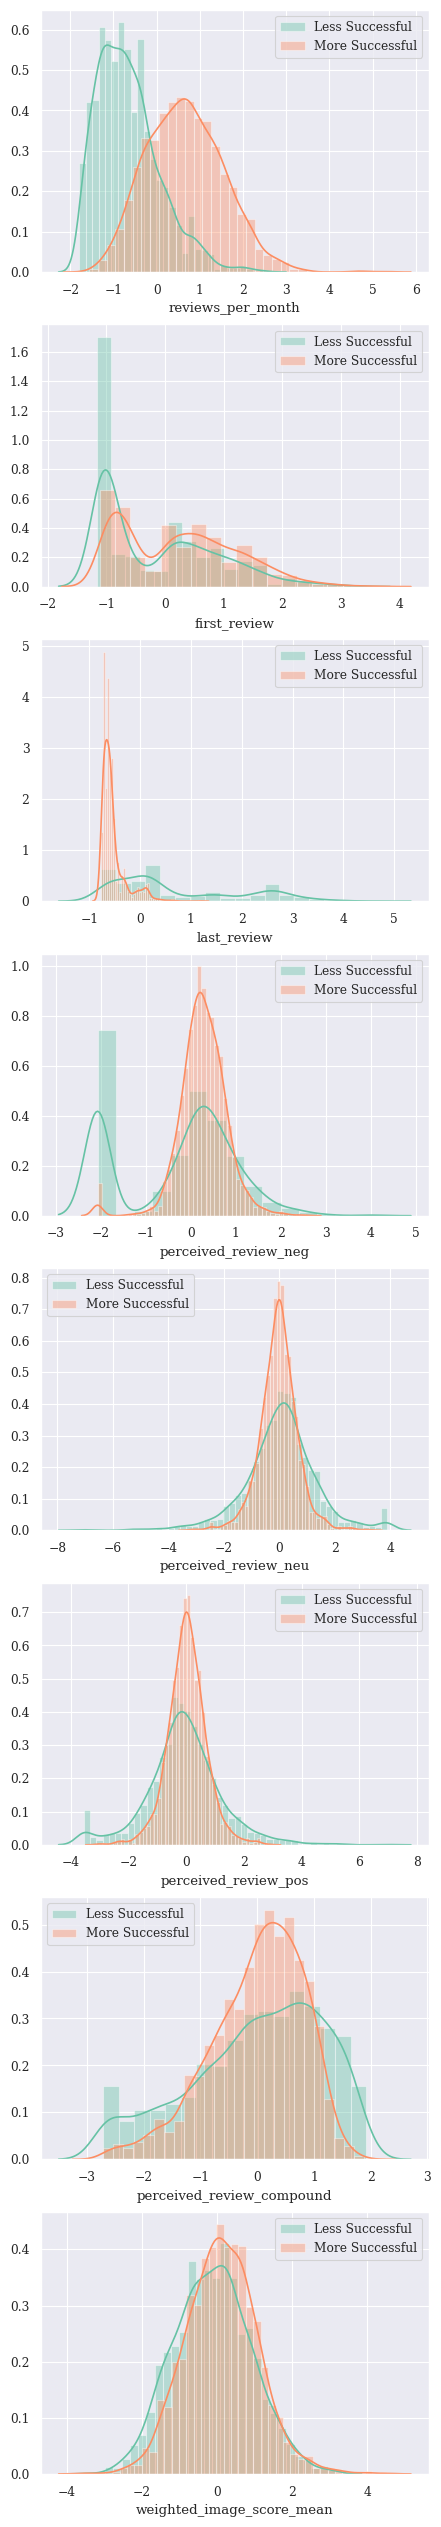

In [40]:
# Plot the data to visualise these results.
fig, axes = plt.subplots(len(features_to_consider), 1, figsize=(5, 4*len(features_to_consider)))
unsuccessful, successful = experiment.get_data_split()

for i in range(len(features_to_consider)):
    feature = features_to_consider[i]

    less_sample = unsuccessful[feature]
    more_sample = successful[feature]

    sns.distplot(less_sample, ax=axes[i], label='Less Successful')
    sns.distplot(more_sample, ax=axes[i], label='More Successful')

    axes[i].legend()
    axes[i].set_ylabel('')

## Prepare the Noteworthy Figures for Saving

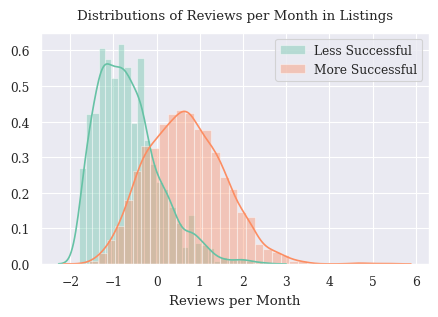

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))

less_sample = unsuccessful['reviews_per_month']
more_sample = successful['reviews_per_month']

sns.distplot(less_sample, 
             ax=ax, label='Less Successful')
sns.distplot(more_sample, 
             ax=ax, label='More Successful')

ax.legend()
ax.set_title("Distributions of Reviews per Month in Listings", pad=10)
ax.set_ylabel("")
ax.set_xlabel("Reviews per Month")

fig.savefig('figures/reviews_per_month_disctribution_comparison.pdf', 
            dpi=300, format='pdf', bbox_inches='tight', facecolor='white')

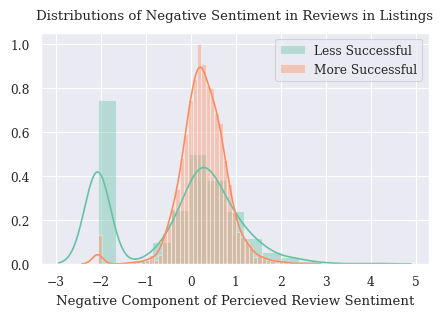

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))

less_sample = unsuccessful['perceived_review_neg']
more_sample = successful['perceived_review_neg']

sns.distplot(less_sample, 
             ax=ax, label='Less Successful')
sns.distplot(more_sample, 
             ax=ax, label='More Successful')

ax.legend()
ax.set_title("Distributions of Negative Sentiment in Reviews in Listings", pad=10)
ax.set_ylabel("")
ax.set_xlabel("Negative Component of Percieved Review Sentiment")

fig.savefig('figures/perceived_review_neg_disctribution_comparison.pdf', 
            dpi=300, format='pdf', bbox_inches='tight', facecolor='white')

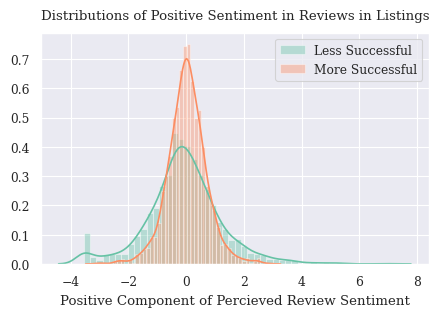

In [44]:
fig, ax = plt.subplots(figsize=(5, 3))

less_sample = unsuccessful['perceived_review_pos']
more_sample = successful['perceived_review_pos']

sns.distplot(less_sample, 
             ax=ax, label='Less Successful')
sns.distplot(more_sample, 
             ax=ax, label='More Successful')

ax.legend()
ax.set_title("Distributions of Positive Sentiment in Reviews in Listings", pad=10)
ax.set_ylabel("")
ax.set_xlabel("Positive Component of Percieved Review Sentiment")

fig.savefig('figures/perceived_review_pos_disctribution_comparison.pdf', 
            dpi=300, format='pdf', bbox_inches='tight', facecolor='white')

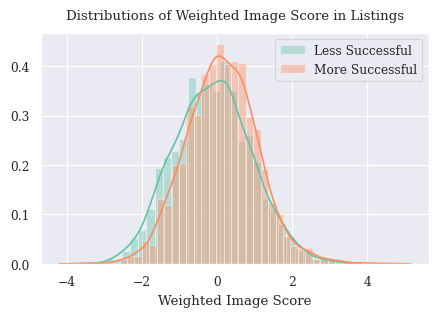

In [45]:
fig, ax = plt.subplots(figsize=(5, 3))

less_sample = unsuccessful['weighted_image_score_mean']
more_sample = successful['weighted_image_score_mean']

sns.distplot(less_sample, 
             ax=ax, label='Less Successful')
sns.distplot(more_sample, 
             ax=ax, label='More Successful')

ax.legend()
ax.set_title("Distributions of Weighted Image Score in Listings", pad=10)
ax.set_ylabel("")
ax.set_xlabel("Weighted Image Score")

fig.savefig('figures/weighted_image_score_mean_disctribution_comparison.pdf', 
            dpi=300, format='pdf', bbox_inches='tight', facecolor='white')

# RQ3

In [30]:
# Define the structured-only, unstructured-only, and hybrid datasets.
structured_features = [
    'host_since', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
    'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'has_availability',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
    'first_review', 'last_review', 'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'reviews_per_month'
]

unstructured_features = [
    'title_neg', 'title_neu', 'title_pos', 'title_compound',
    'description_neg', 'description_neu', 'description_pos',
    'description_compound', 'neighborhood_overview_neg',
    'neighborhood_overview_neu', 'neighborhood_overview_pos',
    'neighborhood_overview_compound', 'host_about_neg', 'host_about_neu',
    'host_about_pos', 'host_about_compound', 'perceived_review_neg',
    'perceived_review_neu', 'perceived_review_pos',
    'perceived_review_compound',
    'weighted_image_score_mean', 'weighted_image_score_max',
    'weighted_image_score_min', 'weighted_image_score_std'
]

hybrid_features = structured_features + unstructured_features

experiment = RQs.RQ3(data, structured_features, unstructured_features, hybrid_features)
results = experiment.run().reset_index().iloc[:,1:]
results

,Model,Dataset,MAE,MSE,R2 Score
0,Linear Regression,Structured,0.317117,0.420188,0.700879
1,Linear Regression,Unstructured,0.901909,0.759982,0.149274
2,Linear Regression,Hyrbid,0.316911,0.422308,0.701074
3,Support Vector Regression (SVR),Structured,0.193856,0.304258,0.817145
4,Support Vector Regression (SVR),Unstructured,0.820364,0.692430,0.226191
5,Support Vector Regression (SVR),Hyrbid,0.200985,0.320232,0.810421
6,Multi-Layer Perceptron (MLP),Structured,0.190120,0.305313,0.820670
7,Multi-Layer Perceptron (MLP),Unstructured,0.880602,0.727440,0.169371
8,Multi-Layer Perceptron (MLP),Hyrbid,0.265135,0.379363,0.749911
9,Gaussian Process Regression,Structured,0.665042,0.635642,0.372699


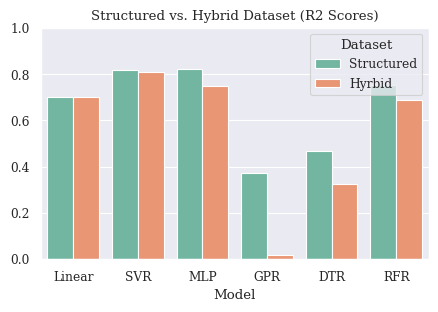

In [31]:
# Plot R2 scores...
data = results.replace({
    'Linear Regression' : 'Linear',
    'Support Vector Regression (SVR)' : 'SVR',
    'Multi-Layer Perceptron (MLP)' : 'MLP',
    'Gaussian Process Regression' : 'GPR',
    'Decision Tree Regression' : 'DTR',
    'Random Forest Regression' : 'RFR'
})[results['Dataset'] != 'Unstructured']

fig, ax = plt.subplots(figsize=(5,3))

sns.barplot(
    data=data, 
    x='Model', y='R2 Score', hue='Dataset',
    ax = ax
)

ax.set_ylim(0,1)
ax.set_title('Structured vs. Hybrid Dataset (R2 Scores)')
ax.set_ylabel('')

fig.savefig('figures/structured_vs_hybrid_r2.pdf', 
            dpi=300, format='pdf', bbox_inches='tight', facecolor='white')